In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style("darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics.pairwise import euclidean_distances


from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz

%matplotlib inline 

df = pd.read_csv('D:\Python\Project\_MVC.csv')#,parse_dates=['Year'],dayfirst=True,index_col='Year')
df.describe()

,Year,Case Vehicle ID,Vehicle Year,Number of Occupants,Engine Cylinders
count,1.048575e+06,1.048575e+06,890678.000000,917269.000000,834192.000000
mean,2.014520e+03,1.259372e+07,2007.229412,1.394028,5.309894
std,4.996539e-01,5.149331e+05,5.601122,1.451628,1.451409
min,2.014000e+03,1.162350e+07,1900.000000,0.000000,0.000000
25%,2.014000e+03,1.216305e+07,2004.000000,1.000000,4.000000
50%,2.015000e+03,1.256505e+07,2008.000000,1.000000,6.000000
75%,2.015000e+03,1.303935e+07,2012.000000,2.000000,6.000000
max,2.016000e+03,1.396555e+07,2016.000000,601.000000,16.000000


In [2]:
df.dropna(axis=0)
df.head(5)
#df['Vehicle Body Type'].value_counts()


,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
0,2016,13364291,SUBURBAN,PASSENGER OR SUBURBAN,Changing Lanes,Not Entered,West,Gas,2012.0,NY,1.0,4.0,MINI,HUMAN,Unsafe Lane Changing,HUMAN,Not Applicable,Not Applicable,WMWZC3C57CWL81108
1,2016,13364304,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,East,Gas,2014.0,NY,2.0,6.0,CHEVR,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,3GCUKREH8EG196335
2,2016,13364305,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2007.0,NY,1.0,4.0,HONDA,ENVMT,Pavement Slippery,HUMAN,Not Applicable,Not Applicable,1HGCM56387A220086
3,2016,13364307,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2011.0,NY,4.0,4.0,CHEVR,ENVMT,Pavement Slippery,ENVMT,Obstruction/ Debris,Unknown,2CNFLCEC1B6362978
4,2016,13364306,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2004.0,NY,1.0,6.0,BUICK,ENVMT,Pavement Slippery,HUMAN,Not Applicable,"Snow Embankment, Collision With Fixed Object",3G5DA03E04S597761


# We'll separate the years

In [3]:
y_2014 = df[df['Year']==2014]
y_2015 = df[df['Year']==2015]
y_2016 = df[df['Year']==2016]
print()

# Let us view the data columns in order to see what we got here

In [4]:
y_2014.columns

Index(['Year', 'Case Vehicle ID', 'Vehicle Body Type', 'Registration Class',
       'Action Prior to Accident', 'Type / Axles of Truck or Bus',
       'Direction of Travel', 'Fuel Type', 'Vehicle Year',
       'State of Registration', 'Number of Occupants', 'Engine Cylinders',
       'Vehicle Make', 'Contributing Factor 1',
       'Contributing Factor 1 Description', 'Contributing Factor 2',
       'Contributing Factor 2 Description', 'Event Type', 'Partial VIN'],
      dtype='object')

In [5]:
y_2014

,Year,Case Vehicle ID,Vehicle Body Type,Registration Class,Action Prior to Accident,Type / Axles of Truck or Bus,Direction of Travel,Fuel Type,Vehicle Year,State of Registration,Number of Occupants,Engine Cylinders,Vehicle Make,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type,Partial VIN
544974,2014,11623503,2 DOOR SEDAN,Not Entered,Going Straight Ahead,Not Entered,West,Not Entered,2005.0,NJ,2.0,NaN,CHEV,HUMAN,Failure to Yield Right-of-Way,HUMAN,Following Too Closely,Not Applicable,NaN
544975,2014,11623504,2 DOOR SEDAN,Not Entered,Going Straight Ahead,Not Entered,West,Not Entered,1992.0,FL,1.0,NaN,HOND,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable,NaN
544976,2014,11623526,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,North,Gas,2008.0,NY,2.0,4.0,NISSA,ENVMT,Animal's Action,HUMAN,Not Applicable,Not Applicable,3N1BC13E98L377750
544977,2014,11623535,VAN TRUCK,AMBULANCE,Going Straight Ahead,Not Entered,South,Diesel,2010.0,NY,2.0,8.0,FORD,HUMAN,Fell Asleep,HUMAN,Not Applicable,Not Applicable,1FDSS3EP4ADA39576
544978,2014,11623681,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,West,Gas,2003.0,NY,1.0,4.0,SATUR,HUMAN,Fell Asleep,HUMAN,Not Applicable,"Tree, Collision With Fixed Object",1G8JU54FX3Y558930
544979,2014,11627567,SUBURBAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,1999.0,NY,3.0,6.0,NISSA,HUMAN,Unsafe Speed,ENVMT,Pavement Slippery,"Overturned, Non-Collision",JN8AR07Y2XW366625
544980,2014,11627569,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Slowing or Stopping,Not Entered,East,Gas,2003.0,NY,1.0,6.0,CHEVR,HUMAN,Unsafe Speed,HUMAN,Not Applicable,Not Applicable,1G1ND52J53M616618
544981,2014,11627573,PICKUP TRUCK,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,South,Gas,2000.0,NY,1.0,8.0,CHEVR,HUMAN,Unsafe Speed,ENVMT,Pavement Slippery,Not Applicable,1GCGK29U2YE276625
544982,2014,11627581,PICKUP TRUCK,COMMERCIAL,Going Straight Ahead,Not Entered,East,Diesel,2003.0,NY,2.0,6.0,DODGE,HUMAN,Unsafe Speed,ENVMT,Pavement Slippery,"Overturned, Non-Collision",3D7KU28C03G815859
544983,2014,11627589,4 DOOR SEDAN,PASSENGER OR SUBURBAN,Going Straight Ahead,Not Entered,West,Gas,2002.0,NY,1.0,4.0,NISSA,HUMAN,Unsafe Speed,ENVMT,Pavement Slippery,Not Applicable,1N4AL11D72C132120


In [6]:
neededColumns = ['Year','Vehicle Make','Vehicle Year','Vehicle Body Type','Engine Cylinders', 'Fuel Type', 
                 'Action Prior to Accident','Direction of Travel',
                 'Number of Occupants',
                 'Contributing Factor 1','Contributing Factor 1 Description', 
                 'Contributing Factor 2',
                 'Contributing Factor 2 Description',
                 'Event Type']

print()

# Lets drop NaN's and reset the indexes

In [7]:
y_2016 = y_2016.dropna(axis=0)
y_2015 = y_2015.dropna(axis=0)
y_2014 = y_2014.dropna(axis=0)

y_2014 = y_2014.reset_index(drop=True)
y_2015 = y_2015.reset_index(drop=True)
y_2016 = y_2016.reset_index(drop=True)

In [8]:
y_2016 = y_2016[neededColumns]
y_2015 = y_2015[neededColumns]
y_2014 = y_2014[neededColumns]
print()

In [9]:
y_2015.head(5)

,Year,Vehicle Make,Vehicle Year,Vehicle Body Type,Engine Cylinders,Fuel Type,Action Prior to Accident,Direction of Travel,Number of Occupants,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type
0,2015,MACK,2005.0,DUMP,6.0,Diesel,Making Right Turn,South,1.0,HUMAN,Driver Inattention/Distraction*,VEHICLE,Oversized Vehicle,Not Applicable
1,2015,OLDSM,1997.0,SUBURBAN,6.0,Gas,Going Straight Ahead,North,1.0,HUMAN,Not Applicable,HUMAN,Traffic Control Device Disregarded,Not Applicable
2,2015,HONDA,2014.0,SUBURBAN,6.0,Gas,Making Left Turn,East,2.0,HUMAN,Not Applicable,HUMAN,Driver Inattention/Distraction*,"Building/Wall, Collision With Fixed Object"
3,2015,SUBAR,2012.0,SUBURBAN,4.0,Gas,Merging,West,1.0,HUMAN,Not Applicable,HUMAN,Not Applicable,Not Applicable
4,2015,TOYOT,2010.0,4 DOOR SEDAN,4.0,Gas,Going Straight Ahead,West,1.0,HUMAN,Not Applicable,HUMAN,Driver Inattention/Distraction*,Not Applicable


In [10]:
y_2014.head(5)

,Year,Vehicle Make,Vehicle Year,Vehicle Body Type,Engine Cylinders,Fuel Type,Action Prior to Accident,Direction of Travel,Number of Occupants,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type
0,2014,NISSA,2008.0,4 DOOR SEDAN,4.0,Gas,Going Straight Ahead,North,2.0,ENVMT,Animal's Action,HUMAN,Not Applicable,Not Applicable
1,2014,FORD,2010.0,VAN TRUCK,8.0,Diesel,Going Straight Ahead,South,2.0,HUMAN,Fell Asleep,HUMAN,Not Applicable,Not Applicable
2,2014,SATUR,2003.0,4 DOOR SEDAN,4.0,Gas,Going Straight Ahead,West,1.0,HUMAN,Fell Asleep,HUMAN,Not Applicable,"Tree, Collision With Fixed Object"
3,2014,NISSA,1999.0,SUBURBAN,6.0,Gas,Going Straight Ahead,South,3.0,HUMAN,Unsafe Speed,ENVMT,Pavement Slippery,"Overturned, Non-Collision"
4,2014,CHEVR,2003.0,4 DOOR SEDAN,6.0,Gas,Slowing or Stopping,East,1.0,HUMAN,Unsafe Speed,HUMAN,Not Applicable,Not Applicable


# Lets do dome charts =)

# Contributing_Factor_1 Year 2014

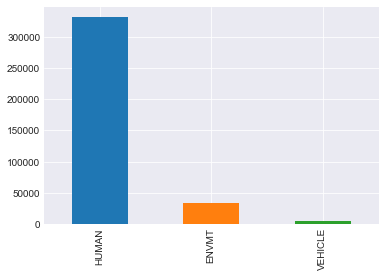

In [11]:
Contributing_Factor_1_2014 = y_2014['Contributing Factor 1'].value_counts()
Contributing_Factor_1_2014.plot(kind='bar')

# Contributing_Factor_1 Year 2015

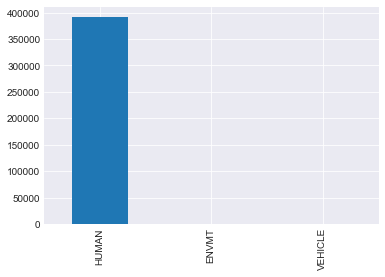

In [12]:
Contributing_Factor_1_2015 = y_2015['Contributing Factor 1'].value_counts()
Contributing_Factor_1_2015.plot(kind='bar')

In [13]:
y_2014.head(3)

,Year,Vehicle Make,Vehicle Year,Vehicle Body Type,Engine Cylinders,Fuel Type,Action Prior to Accident,Direction of Travel,Number of Occupants,Contributing Factor 1,Contributing Factor 1 Description,Contributing Factor 2,Contributing Factor 2 Description,Event Type
0,2014,NISSA,2008.0,4 DOOR SEDAN,4.0,Gas,Going Straight Ahead,North,2.0,ENVMT,Animal's Action,HUMAN,Not Applicable,Not Applicable
1,2014,FORD,2010.0,VAN TRUCK,8.0,Diesel,Going Straight Ahead,South,2.0,HUMAN,Fell Asleep,HUMAN,Not Applicable,Not Applicable
2,2014,SATUR,2003.0,4 DOOR SEDAN,4.0,Gas,Going Straight Ahead,West,1.0,HUMAN,Fell Asleep,HUMAN,Not Applicable,"Tree, Collision With Fixed Object"


# Lets look at the human factor

In [14]:
only_human_2014 = y_2014[y_2014['Contributing Factor 1'] == 'HUMAN']
only_human_2015 = y_2015[y_2015['Contributing Factor 1'] == 'HUMAN']

In [15]:
only_human_2014.columns

Index(['Year', 'Vehicle Make', 'Vehicle Year', 'Vehicle Body Type',
       'Engine Cylinders', 'Fuel Type', 'Action Prior to Accident',
       'Direction of Travel', 'Number of Occupants', 'Contributing Factor 1',
       'Contributing Factor 1 Description', 'Contributing Factor 2',
       'Contributing Factor 2 Description', 'Event Type'],
      dtype='object')

In [16]:
without_Not_Applicable_2014 = only_human_2014['Contributing Factor 1 Description'] != 'Not Applicable'
without_Not_Entered_2014 = only_human_2014['Contributing Factor 1 Description'] != 'Not Entered'
only_human_2014 = only_human_2014[without_Not_Applicable_2014 & without_Not_Entered_2014]

without_Not_Applicable_2015 = only_human_2015['Contributing Factor 1 Description'] != 'Not Applicable'
without_Not_Entered_2015 = only_human_2015['Contributing Factor 1 Description'] != 'Not Entered'
only_human_2015 = only_human_2015[without_Not_Applicable_2015 & without_Not_Entered_2015]

In [17]:
counts_2014 = only_human_2014['Contributing Factor 1 Description'].value_counts()
counts_2014

Following Too Closely                   29495
Driver Inattention/Distraction*         26478
Failure to Yield Right-of-Way           26152
Unsafe Speed                            15186
Unknown                                 12424
Backing Unsafely                         7639
Passing or Lane Usage Improper           6970
Unsafe Lane Changing                     5554
Traffic Control Device Disregarded       5279
Reaction to Other Uninvolved Vehicle     5117
Turning Improperly                       4786
Alcohol Involvement                      4781
Fell Asleep                              2081
Driver Inexperience*                     1974
Failure to Keep Right                    1893
Illness                                   675
Lost Consciousness                        658
Fatigued/Drowsy                           574
Outside Car Distraction*                  508
Passing Too Closely                       495
Aggressive Driving/Road Rage              456
Drugs (Illegal)                   

In [18]:
counts_2015 = only_human_2015['Contributing Factor 1 Description'].value_counts()
counts_2015

Driver Inattention/Distraction*         19583
Unsafe Speed                            10251
Failure to Yield Right-of-Way            7853
Following Too Closely                    6754
Unknown                                  4931
Alcohol Involvement                      4337
Passing or Lane Usage Improper           2509
Backing Unsafely                         2488
Driver Inexperience*                     2263
Traffic Control Device Disregarded       1222
Unsafe Lane Changing                      984
Turning Improperly                        959
Fell Asleep                               947
Reaction to Other Uninvolved Vehicle      931
Failure to Keep Right                     496
Drugs (Illegal)                           442
Illness                                   338
Lost Consciousness                        190
Outside Car Distraction*                  135
Passenger Distraction                     111
Prescription Medication                   104
Fatigued/Drowsy                   

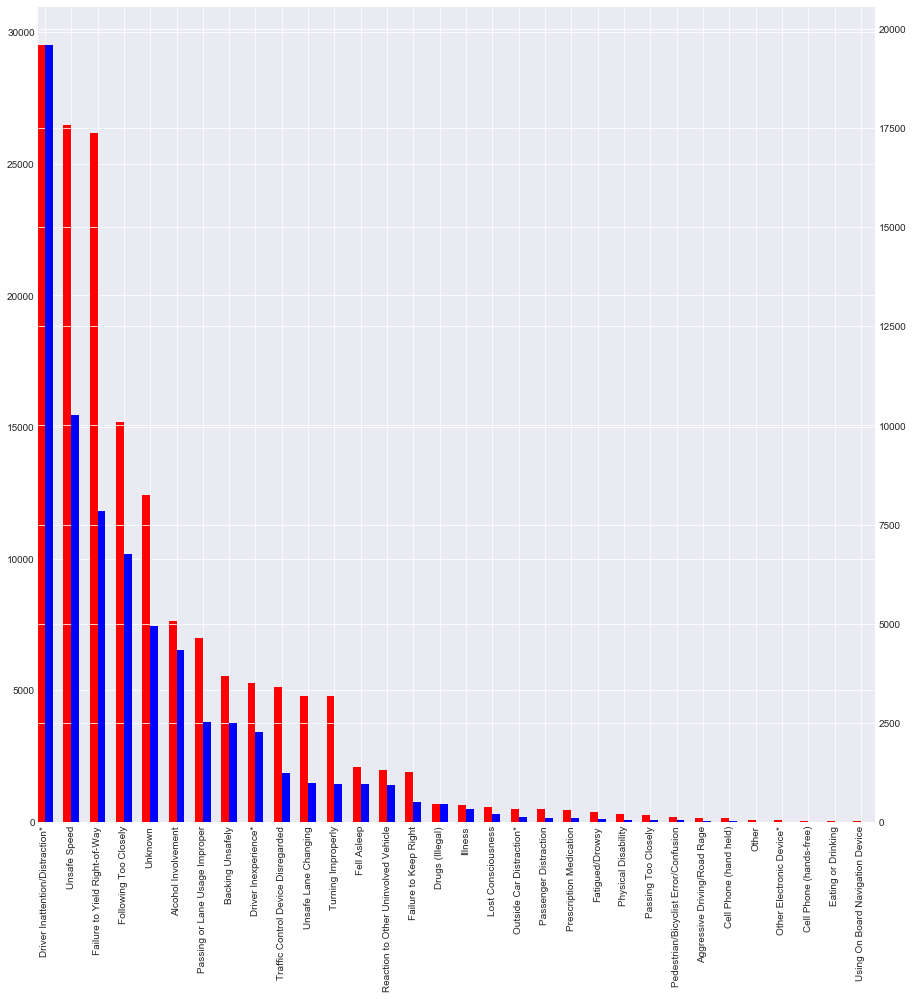

In [19]:
plt.rcParams['figure.figsize'] = (15, 15)
fig = plt.figure()
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.3

counts_2014.plot(kind='bar', color='red', ax=ax, width=width, position=1, label='2014')
counts_2015.plot(kind='bar', color='blue', ax=ax2, width=width, position=0, label='2015')


# Ok. Here we can see that in 2015 significant reduce in most of the accident factors

# Contributing Factor 1 (Human) 2014 Normalization 

In [20]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
#plt.rcParams['figure.figsize'] = (15, 15)
x_2014 = only_human_2014['Contributing Factor 1 Description'].value_counts()

x_2014 = x_2014.values
x_2014 = x_2014.reshape((len(x_2014)), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(x_2014)

print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))


normalized_2014 = scaler.transform(x_2014)
normalized_2014


#Contributing_Factor_1.plot.pie(figsize = (10,10), autopct = '%0.2f%%')


Min: 1.000000, Max: 29495.000000


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1.00000000e+00],
       [8.97708008e-01],
       [8.86654913e-01],
       [5.14850478e-01],
       [4.21204313e-01],
       [2.58967926e-01],
       [2.36285346e-01],
       [1.88275581e-01],
       [1.78951651e-01],
       [1.73459009e-01],
       [1.62236387e-01],
       [1.62066861e-01],
       [7.05228182e-02],
       [6.68949617e-02],
       [6.41486404e-02],
       [2.28521055e-02],
       [2.22757171e-02],
       [1.94276802e-02],
       [1.71899369e-02],
       [1.67491693e-02],
       [1.54268665e-02],
       [1.28839764e-02],
       [1.07140435e-02],
       [8.61192107e-03],
       [6.34027260e-03],
       [5.45873737e-03],
       [5.05187496e-03],
       [2.50898488e-03],
       [2.37336407e-03],
       [1.66135485e-03],
       [9.49345630e-04],
       [7.79819624e-04],
       [7.12009222e-04],
       [0.00000000e+00]])

# Contributing Factor 1 (Human) 2015 Normalization 

In [21]:
from pandas import Series
from sklearn.preprocessing import MinMaxScaler
#plt.rcParams['figure.figsize'] = (15, 15)
x_2015 = only_human_2015['Contributing Factor 1 Description'].value_counts()

x_2015 = x_2015.values
x_2015 = x_2015.reshape((len(x_2015)), 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(x_2015)

print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))


normalized_2015 = scaler.transform(x_2015)

normalized_2015


#Contributing_Factor_1.plot.pie(figsize = (10,10), autopct = '%0.2f%%')



Min: 2.000000, Max: 19583.000000


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[1.00000000e+00],
       [5.23415556e-01],
       [4.00949900e-01],
       [3.44824064e-01],
       [2.51723610e-01],
       [2.21388080e-01],
       [1.28032276e-01],
       [1.26959808e-01],
       [1.15469077e-01],
       [6.23052960e-02],
       [5.01506562e-02],
       [4.88739084e-02],
       [4.82610694e-02],
       [4.74439508e-02],
       [2.52285379e-02],
       [2.24707625e-02],
       [1.71594913e-02],
       [9.60114397e-03],
       [6.79229866e-03],
       [5.56662070e-03],
       [5.20913130e-03],
       [4.03452326e-03],
       [2.45135591e-03],
       [2.14493642e-03],
       [1.78744701e-03],
       [1.17460804e-03],
       [1.07246821e-03],
       [2.55349574e-04],
       [2.55349574e-04],
       [1.53209744e-04],
       [1.02139829e-04],
       [0.00000000e+00]])

# Lets do the same for the enviorment

In [22]:
only_env_2014 = y_2014[y_2014['Contributing Factor 1'] == 'ENVMT']
only_env_2015 = y_2015[y_2015['Contributing Factor 1'] == 'ENVMT']

In [23]:
only_env_2014 = only_env_2014['Contributing Factor 1 Description'].value_counts()
only_env_2014

Animal's Action                                19014
Pavement Slippery                              10224
View Obstructed/Limited                         2248
Obstruction/ Debris                             1214
Glare                                           1131
Pavement Defective                               232
Traffic Control Device Improper/Non-Working      148
Lane Marking Improper/Inadequate                  82
Shoulders Defective/Improper                      31
Other*                                            18
Name: Contributing Factor 1 Description, dtype: int64

In [24]:
only_env_2015 = only_env_2015['Contributing Factor 1 Description'].value_counts()
only_env_2015

Pavement Slippery                              343
Animal's Action                                287
Glare                                          121
Obstruction/ Debris                            118
Pavement Defective                              35
View Obstructed/Limited                         20
Lane Marking Improper/Inadequate                18
Traffic Control Device Improper/Non-Working      7
Shoulders Defective/Improper                     3
Name: Contributing Factor 1 Description, dtype: int64

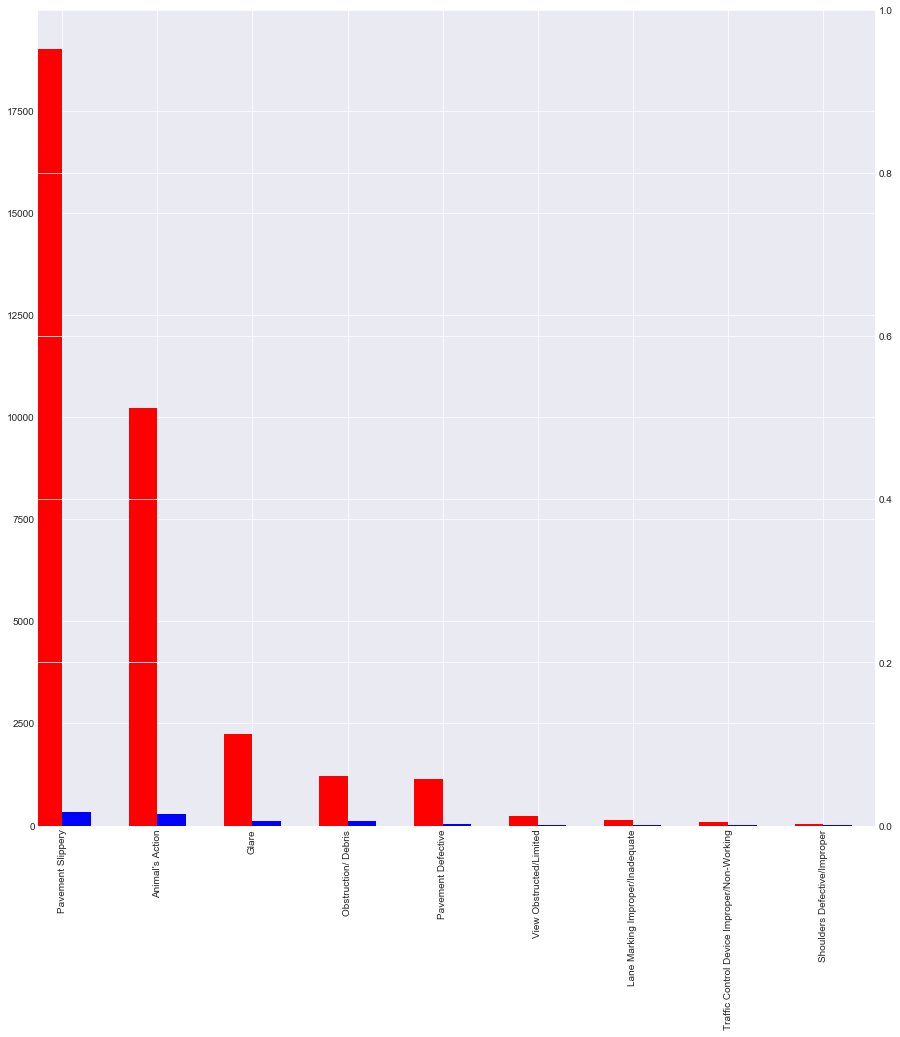

In [25]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax2 = ax.twinx()
width = 0.3
only_env_2014.plot(kind='bar', color='red', ax=ax, width=width, position=1, label='2014')
only_env_2015.plot(kind='bar', color='blue', ax=ax, width=width, position=0, label='2015')


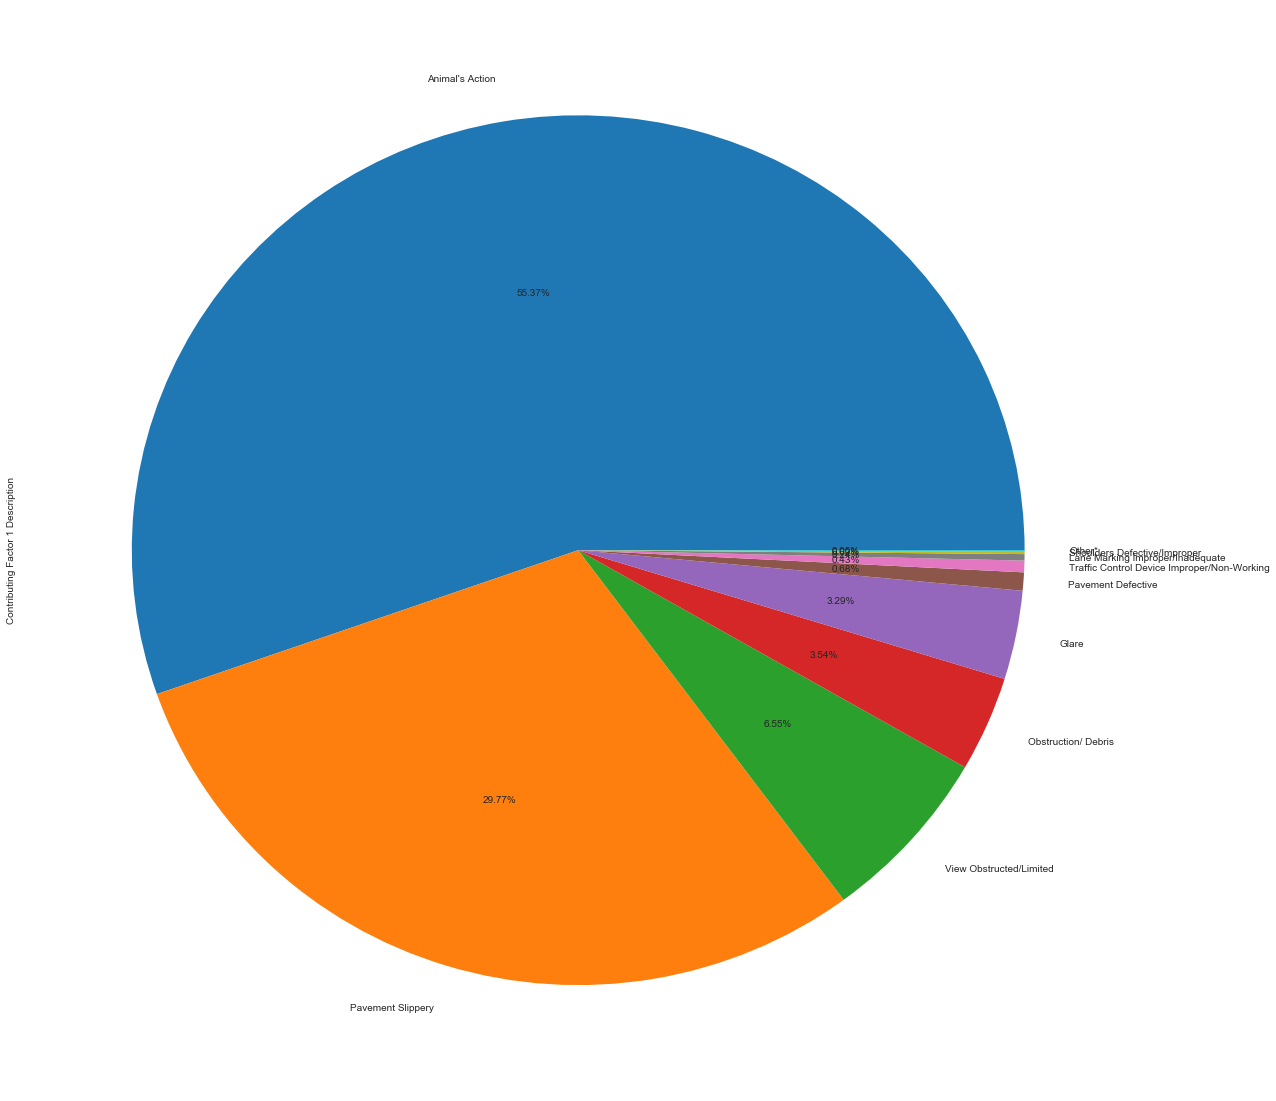

In [26]:
only_env_2014.plot.pie(figsize = (20,20), autopct = '%0.2f%%')

# 2014 - Enviorment___ ok, in this Pie Chart we can see that animals can cause a lot of trouble on the roads(55 %)

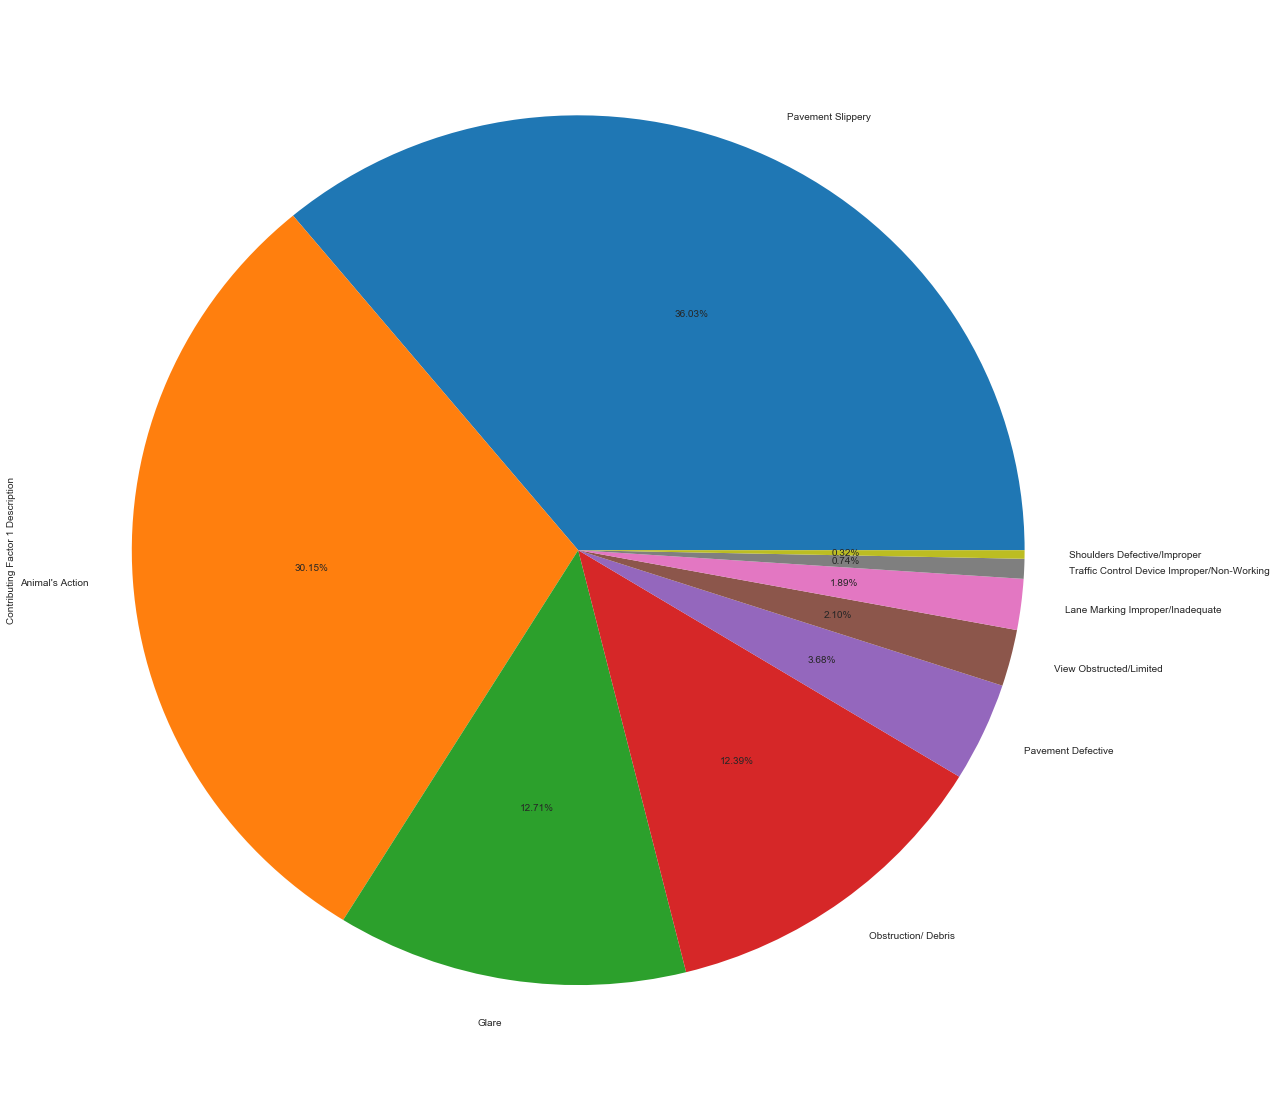

In [27]:
only_env_2015.plot.pie(figsize = (20,20), autopct = '%0.2f%%')

# 2015 - Enviorment___ in 2015 we can see that slippery pavement contributed a lot to the car accidents 

# ________________________________________________________________

# Lets do some Clustering (ass we learned in class), firstly we'll separate the needed columns and try to find some kind useful information about the years 2014 and 2015 

In [28]:
needed_columns = ['Year','Vehicle Make', 'Vehicle Year', 'Vehicle Body Type',
                'Action Prior to Accident', 'Event Type']

y__2014 = df[df['Year']==2014]
y__2015 = df[df['Year']==2015]

In [29]:
y__2014 = y__2014.dropna(axis=0)
y__2015 = y__2015.dropna(axis=0)

y__2014 = y__2014.reset_index(drop=True)
y__2015 = y__2015.reset_index(drop=True)

In [30]:
y__2014 = y__2014[needed_columns]
y__2015 = y__2015[needed_columns]

# We'll try to see the groups of the cars by the year they were built, we'll use K_Means alg (which works on distances between the data), and we'll take the years 2014 and 2015

In [31]:
from sklearn.cluster import KMeans
from copy import deepcopy

#Vehicle_Make_2014 = y__2014['Vehicle Make']
Current_2014_Year = y__2014['Year']
Vehicle_Year_2014 = y__2014['Vehicle Year']
Vehicle_Year_2015 = y__2015['Vehicle Year']

#f1 = Current_2014_Year.values
f1 = Vehicle_Year_2014.values
f2 = Vehicle_Year_2015.values

X = np.array(list(zip(f1, f2)))
X


array([[2008., 2005.],
       [2010., 1997.],
       [2003., 2014.],
       ...,
       [2014., 1999.],
       [2013., 2015.],
       [2008., 1999.]])

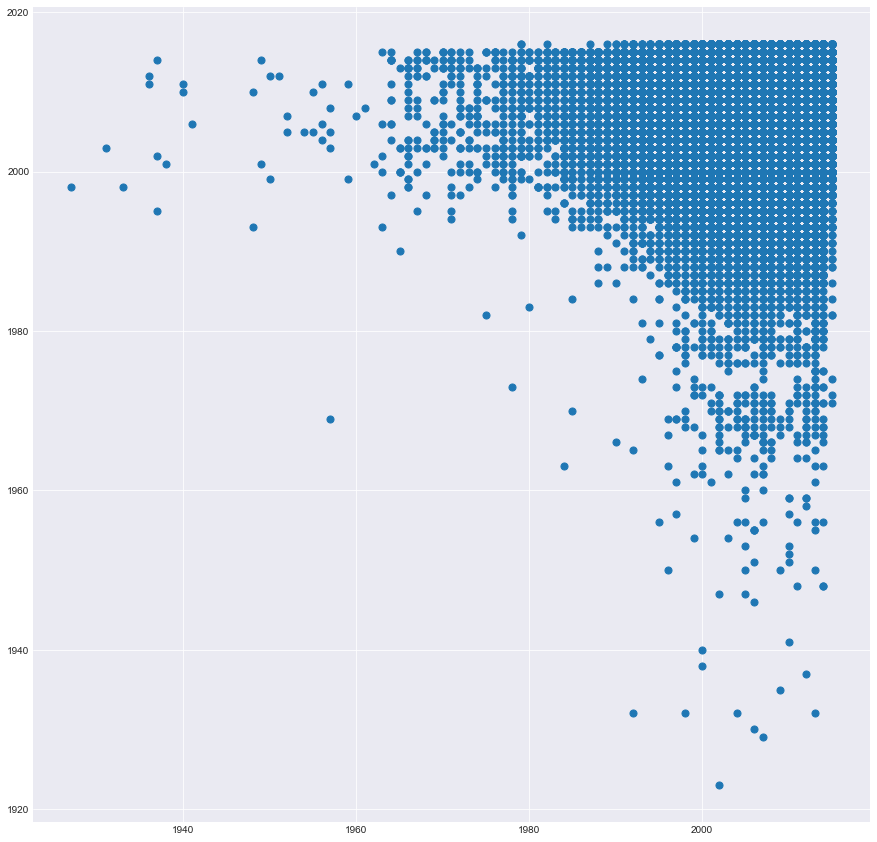

In [32]:
plt.scatter(X[:, 0], X[:, 1], s=50)

In [67]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# By default we gave the K-Means Alg 10 clusters, as we can see the chart below shows us the the groups of cars (by manufacture year) which were involved in car accidents in those years, we can see that "new" cars were involved less in accidents, yet the "older" cars groups is larger 

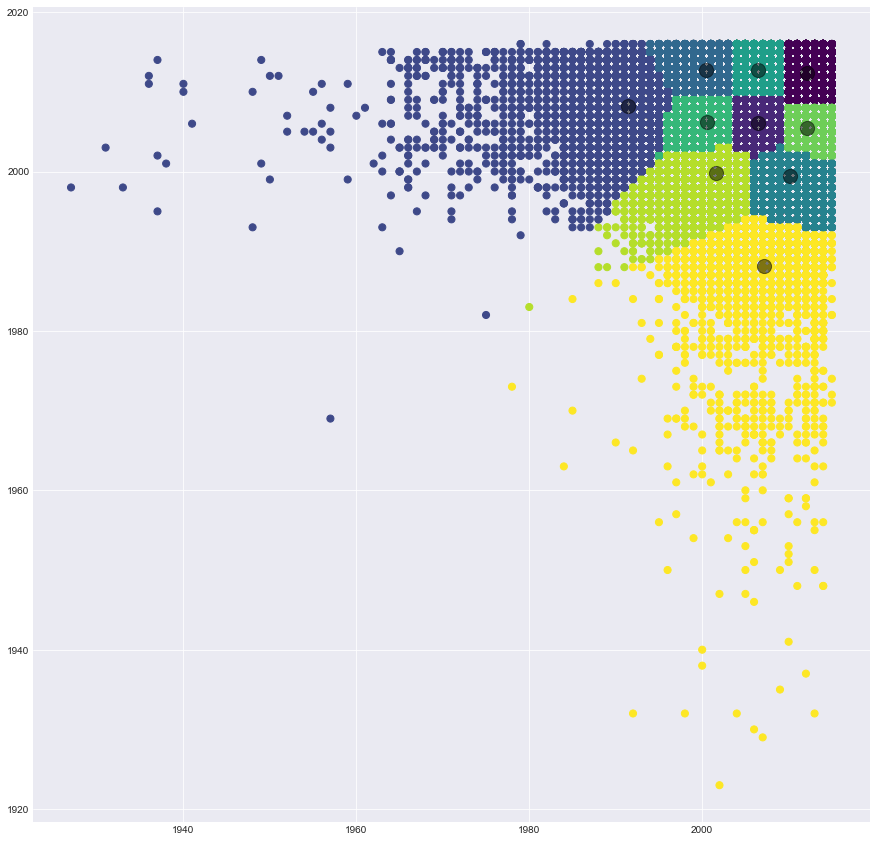

In [68]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.ylim = f2.max
plt.xlim = f1.max
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Achtung!

In [41]:
X

array([[2008., 2005.],
       [2010., 1997.],
       [2003., 2014.],
       ...,
       [2014., 1999.],
       [2013., 2015.],
       [2008., 1999.]])

# We'll use the elbow method to verify the optimal ammount of clusters

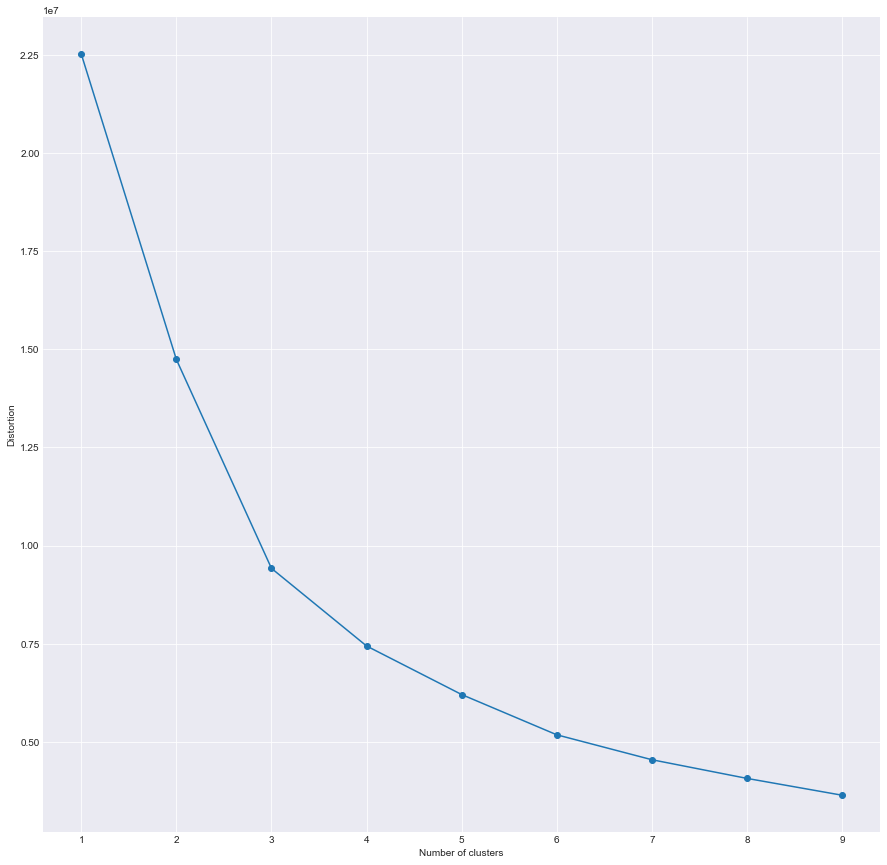

In [43]:
distortions = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# We can see that the elbow method gave us that the optimal ammount of clusters is 3

# ________________________________________________

# We'll make the same clustering but for the Vehicle Body Type 	and Vehicle Make - for that we'll convert all non numeric data into numeric

In [44]:
numeric_2014 = y__2014.copy()
numeric_2015 = y__2015.copy()

# Aiding function (thank God to DR google)

# Converting non numeric data to numeric

In [101]:
def handle_non_numerical_data(_X):
    columns = _X.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if _X[column].dtype != np.int64 and _X[column].dtype != np.float64:
            column_contents = _X[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            _X[column] = list(map(convert_to_int, _X[column]))

    return _X

In [102]:
y__2014.head()

,Year,Vehicle Make,Vehicle Year,Vehicle Body Type,Action Prior to Accident,Event Type
0,2014,NISSA,2008.0,4 DOOR SEDAN,Going Straight Ahead,Not Applicable
1,2014,FORD,2010.0,VAN TRUCK,Going Straight Ahead,Not Applicable
2,2014,SATUR,2003.0,4 DOOR SEDAN,Going Straight Ahead,"Tree, Collision With Fixed Object"
3,2014,NISSA,1999.0,SUBURBAN,Going Straight Ahead,"Overturned, Non-Collision"
4,2014,CHEVR,2003.0,4 DOOR SEDAN,Slowing or Stopping,Not Applicable


In [103]:
#tmp = y_2014[y_2014['Event Type'] != 'Not Applicable']
#tmp = tmp[tmp['Event Type'] != 'Not Entered']
#tmp = tmp.reset_index(drop=True)
#tmp.head(2)
numeric_2014 = handle_non_numerical_data(numeric_2014)
numeric_2015 = handle_non_numerical_data(numeric_2015)

In [104]:
numeric_2014.head(5)

,Year,Vehicle Make,Vehicle Year,Vehicle Body Type,Action Prior to Accident,Event Type
0,2014,594,2008.0,31,0,19
1,2014,170,2010.0,8,0,19
2,2014,216,2003.0,31,0,7
3,2014,594,1999.0,16,0,17
4,2014,364,2003.0,31,7,19


In [105]:
numeric_2015.head(5)

,Year,Vehicle Make,Vehicle Year,Vehicle Body Type,Action Prior to Accident,Event Type
0,2015,218,2005.0,24,14,19
1,2015,138,1997.0,17,0,19
2,2015,461,2014.0,17,3,18
3,2015,274,2012.0,17,6,19
4,2015,238,2010.0,32,0,19


In [106]:
#vehicle make
VM_2014 = numeric_2014['Vehicle Make']
VM_2015 = numeric_2015['Vehicle Make']
#vehicle body type
VBT_2014 = numeric_2014['Vehicle Body Type']
VBT_2015 = numeric_2015['Vehicle Body Type']


# Vehicle Make

In [107]:
VM_f1 = VM_2014.values
VM_f2 = VM_2015.values

Y = np.array(list(zip(VM_f1, VM_f2)))
Y

array([[594, 218],
       [170, 138],
       [216, 461],
       ...,
       [199, 238],
       [193, 461],
       [591, 621]], dtype=int64)

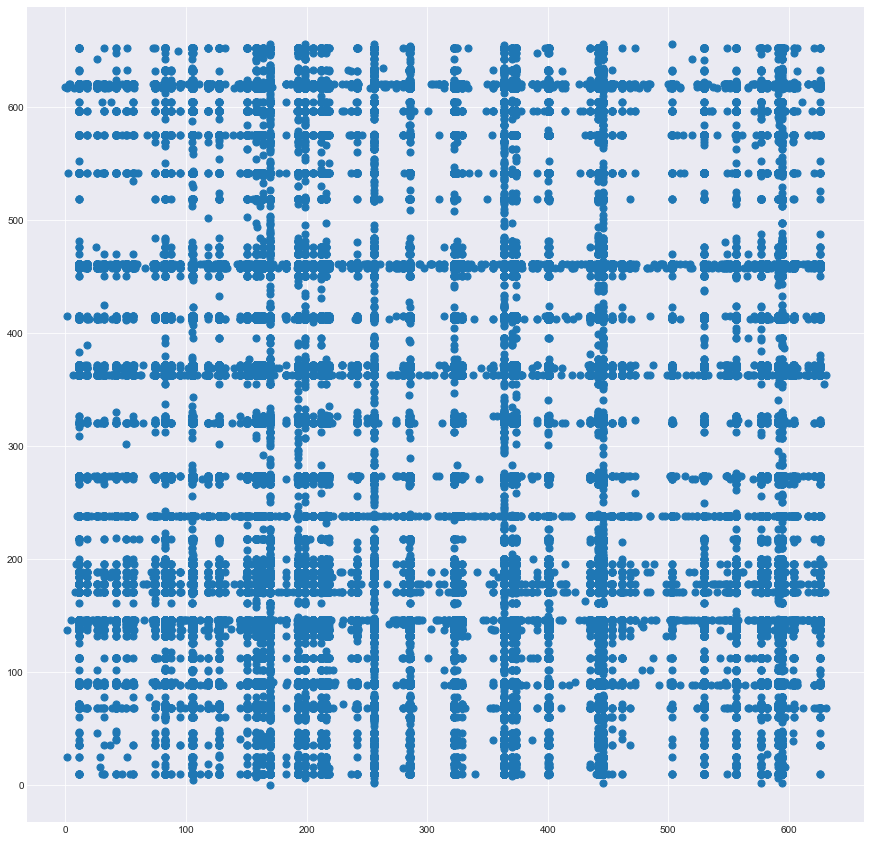

In [108]:
plt.scatter(Y[:, 0], Y[:, 1], s=50)

In [109]:
kmeans_2= KMeans(n_clusters=10)
kmeans_2.fit(Y)
y_kmeans_2 = kmeans.predict(Y)

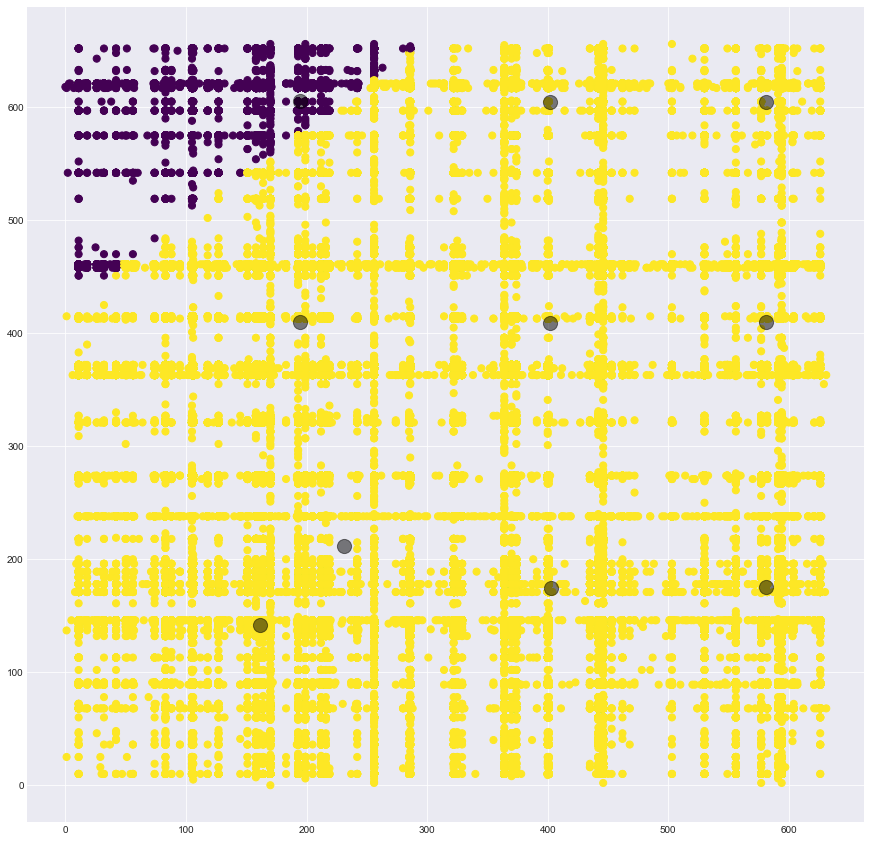

In [110]:
plt.scatter(Y[:, 0], Y[:, 1], c=y_kmeans_2, s=50, cmap='viridis')
plt.ylim = VM_f1.max
plt.xlim = VM_f2.max
centers = kmeans_2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Here we can see that the clustering gave us 2 clusters of vehicle make (Brand) which was involved in car accidents in years 2014 - 2015

# We shall use the elbow method to see if the calculation is correct

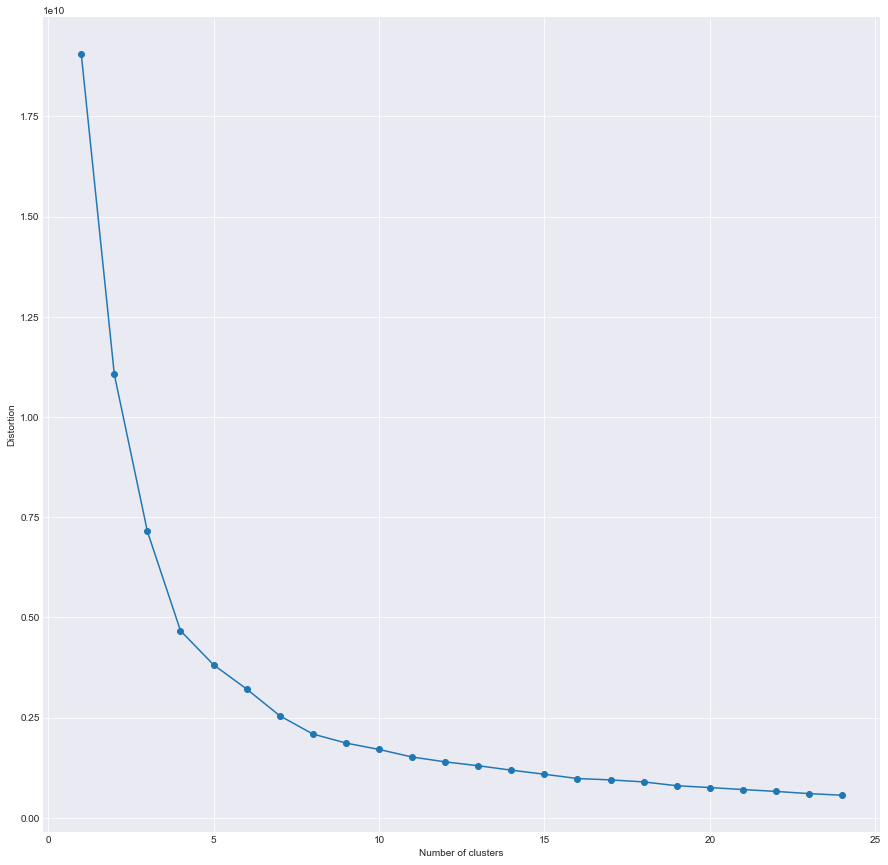

In [111]:
distortions = []
for i in range(1, 25):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(Y)
    distortions.append(km.inertia_)

plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# As we can see the elbow method shows us that the optimal number of cluster is arround 4 - 5, which means that there are 4 or 5 main vehicle brands were involved in car accidents in years 2014 - 2015 

# ______________________

# Linear regression: Y-Action prior accident, X-Contributing factor (human/env/vehicle)

In [112]:
df['Contributing Factor 1'].value_counts()

HUMAN      998519
ENVMT       41301
VEHICLE      8732
Name: Contributing Factor 1, dtype: int64

In [113]:
Relevant_columns = ['Action Prior to Accident','Contributing Factor 1']
LR = y_2014[Relevant_columns]

# 2014

# Bacause linear regression doesn't work with strings, we'll change all values to numbers

In [114]:
LR.loc[LR['Action Prior to Accident'] == 'Changing Lanes','Action Prior to Accident'] = 1 
LR.loc[LR['Action Prior to Accident'] == 'Going Straight Ahead','Action Prior to Accident'] = 2
LR.loc[LR['Action Prior to Accident'] == 'Parked','Action Prior to Accident'] = 3
LR.loc[LR['Action Prior to Accident'] == 'Entering Parked Position','Action Prior to Accident'] = 4
LR.loc[LR['Action Prior to Accident'] == 'Backing','Action Prior to Accident'] = 5
LR.loc[LR['Action Prior to Accident'] == 'Stopped in Traffic','Action Prior to Accident'] = 6
LR.loc[LR['Action Prior to Accident'] == 'Making Right Turn','Action Prior to Accident'] = 7
LR.loc[LR['Action Prior to Accident'] == 'Making Left Turn','Action Prior to Accident'] = 8
LR.loc[LR['Action Prior to Accident'] == 'Slowing or Stopping','Action Prior to Accident'] = 9
LR.loc[LR['Action Prior to Accident'] == 'Starting in Traffic','Action Prior to Accident'] = 10
LR.loc[LR['Action Prior to Accident'] == 'Merging','Action Prior to Accident'] = 11
LR.loc[LR['Action Prior to Accident'] == 'Overtaking/Passing','Action Prior to Accident'] = 12
LR.loc[LR['Action Prior to Accident'] == 'Starting from Parking','Action Prior to Accident'] = 13
LR.loc[LR['Action Prior to Accident'] == 'Making U Turn','Action Prior to Accident'] = 14
LR.loc[LR['Action Prior to Accident'] == 'Avoiding Object in Roadway','Action Prior to Accident'] = 15
LR.loc[LR['Action Prior to Accident'] == 'Making Right Turn on Red','Action Prior to Accident'] = 16
LR.loc[LR['Action Prior to Accident'] == 'Making Left Turn on Red','Action Prior to Accident'] = 17
LR.loc[LR['Action Prior to Accident'] == 'Police Pursuit','Action Prior to Accident'] = 18


#changing the Contributing Factor 1 column to numeric values 
LR.loc[LR['Contributing Factor 1'] == 'HUMAN','Contributing Factor 1'] = 1
LR.loc[LR['Contributing Factor 1'] == 'ENVMT','Contributing Factor 1'] = 2
LR.loc[LR['Contributing Factor 1'] == 'VEHICLE','Contributing Factor 1'] = 3

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is 

# There are some unuseful data we woulid like to vanish - Unknown, Other and Not Entered

In [115]:
LR = LR.rename(index=str, columns={"Action Prior to Accident": "Action_Prior_to_Accident"})
LR = LR[((LR.Action_Prior_to_Accident != 'Unknown') &( LR.Action_Prior_to_Accident != 'Not Entered')
    & (LR.Action_Prior_to_Accident != 'Other') & (LR.Action_Prior_to_Accident != 'Not Applicable'))]

In [116]:
X = LR["Contributing Factor 1"]
X = X.reshape(-1,1)
y = LR["Action_Prior_to_Accident"]
y = y.reshape(-1,1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [118]:
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# After linear regression we will predict action prior the accident:

In [119]:
predictions = linreg.predict(X)
predictions

array([[3.44681474],
       [4.50272436],
       [4.50272436],
       ...,
       [4.50272436],
       [4.50272436],
       [4.50272436]])

# As we can see, according to the prediction algorithm and the numeric value of 4, we predict Entering Parked Position as the prior accident action


In [120]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y , predictions)

9.820115778448171

# As we can see the difference between the predicted value and the real value is 9. Pretty high..

In [121]:
LR2015 = y_2015[Relevant_columns]

In [122]:
LR2015.loc[LR2015['Action Prior to Accident'] == 'Changing Lanes','Action Prior to Accident'] = 1 
LR2015.loc[LR2015['Action Prior to Accident'] == 'Going Straight Ahead','Action Prior to Accident'] = 2
LR2015.loc[LR2015['Action Prior to Accident'] == 'Parked','Action Prior to Accident'] = 3
LR2015.loc[LR2015['Action Prior to Accident'] == 'Entering Parked Position','Action Prior to Accident'] = 4
LR2015.loc[LR2015['Action Prior to Accident'] == 'Backing','Action Prior to Accident'] = 5
LR2015.loc[LR2015['Action Prior to Accident'] == 'Stopped in Traffic','Action Prior to Accident'] = 6
LR2015.loc[LR2015['Action Prior to Accident'] == 'Making Right Turn','Action Prior to Accident'] = 7
LR2015.loc[LR2015['Action Prior to Accident'] == 'Making Left Turn','Action Prior to Accident'] = 8
LR2015.loc[LR2015['Action Prior to Accident'] == 'Slowing or Stopping','Action Prior to Accident'] = 9
LR2015.loc[LR2015['Action Prior to Accident'] == 'Starting in Traffic','Action Prior to Accident'] = 10
LR2015.loc[LR2015['Action Prior to Accident'] == 'Merging','Action Prior to Accident'] = 11
LR2015.loc[LR2015['Action Prior to Accident'] == 'Overtaking/Passing','Action Prior to Accident'] = 12
LR2015.loc[LR2015['Action Prior to Accident'] == 'Starting from Parking','Action Prior to Accident'] = 13
LR2015.loc[LR2015['Action Prior to Accident'] == 'Making U Turn','Action Prior to Accident'] = 14
LR2015.loc[LR2015['Action Prior to Accident'] == 'Avoiding Object in Roadway','Action Prior to Accident'] = 15
LR2015.loc[LR2015['Action Prior to Accident'] == 'Making Right Turn on Red','Action Prior to Accident'] = 16
LR2015.loc[LR2015['Action Prior to Accident'] == 'Making Left Turn on Red','Action Prior to Accident'] = 17
LR2015.loc[LR2015['Action Prior to Accident'] == 'Police Pursuit','Action Prior to Accident'] = 18


#changing the Contributing Factor 1 column to numeric values 
LR2015.loc[LR2015['Contributing Factor 1'] == 'HUMAN','Contributing Factor 1'] = 1
LR2015.loc[LR2015['Contributing Factor 1'] == 'ENVMT','Contributing Factor 1'] = 2
LR2015.loc[LR2015['Contributing Factor 1'] == 'VEHICLE','Contributing Factor 1'] = 3

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is 

In [123]:
LR2015 = LR2015.rename(index=str, columns={"Action Prior to Accident": "Action_Prior_to_Accident"})
LR2015 = LR2015[((LR2015.Action_Prior_to_Accident != 'Unknown') &( LR2015.Action_Prior_to_Accident != 'Not Entered')
    & (LR2015.Action_Prior_to_Accident != 'Other') & (LR2015.Action_Prior_to_Accident != 'Not Applicable'))]

In [124]:
X_2015 = LR2015["Contributing Factor 1"]
X_2015 = X_2015.reshape(-1,1)
y_2015 = LR2015["Action_Prior_to_Accident"]
y_2015 = y_2015.reshape(-1,1)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [125]:
X_train, X_test, y_train, y_test = train_test_split(X_2015,y_2015)

In [126]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [127]:
predictions = model.predict(X_2015)
predictions

array([[4.40327485],
       [4.40327485],
       [4.40327485],
       ...,
       [3.97238856],
       [4.40327485],
       [4.40327485]])

# Here as well we can see, according to the prediction algorithm and the numeric value of 4, we predict Entering Parked Position as the prior accident action

In [128]:
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(y_2015 , predictions)

9.976980239580872